# Analisis Big Data untuk Memetakan Prevalensi dan Faktor Risiko HIV

## Exploratory Data Analysis (EDA) - Dataset HIV/AIDS dari Kaggle

**Tujuan EDA:**
- Memahami struktur data
- Menemukan pola, anomali, dan tren
- Menganalisis hubungan antarvariabel
- Mempersiapkan data untuk modeling dan visualisasi


In [1]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Konfigurasi
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Library berhasil diimport!")
print(f"📅 Tanggal analisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Library berhasil diimport!
📅 Tanggal analisis: 2025-11-25 06:59:09


## 1. Membaca dan Mengenali Data

**Langkah:**
- Membaca file CSV menggunakan pandas
- Mengecek ukuran dataset
- Melihat kolom dan tipe data
- Menampilkan beberapa baris awal


In [2]:
# Membaca dataset utama: Jumlah Orang Hidup dengan HIV per Negara
df_hiv = pd.read_csv('no_of_people_living_with_hiv_by_country_clean.csv')

print("=" * 80)
print("📊 INFORMASI DATASET: Jumlah Orang Hidup dengan HIV")
print("=" * 80)
print(f"\n📏 Ukuran Dataset: {df_hiv.shape[0]} baris × {df_hiv.shape[1]} kolom")
print(f"\n📋 Kolom dalam Dataset:")
print(df_hiv.columns.tolist())
print(f"\n📝 Tipe Data:")
print(df_hiv.dtypes)
print(f"\n🔍 Preview Data (5 baris pertama):")
print(df_hiv.head())


📊 INFORMASI DATASET: Jumlah Orang Hidup dengan HIV

📏 Ukuran Dataset: 680 baris × 7 kolom

📋 Kolom dalam Dataset:
['Country', 'Year', 'Count', 'Count_median', 'Count_min', 'Count_max', 'WHO Region']

📝 Tipe Data:
Country          object
Year              int64
Count            object
Count_median    float64
Count_min       float64
Count_max       float64
WHO Region       object
dtype: object

🔍 Preview Data (5 baris pertama):
       Country  Year                  Count  Count_median  Count_min  \
0  Afghanistan  2018       7200[4100–11000]        7200.0     4100.0   
1      Albania  2018                     na           NaN        NaN   
2      Algeria  2018     16000[15000–17000]       16000.0    15000.0   
3       Angola  2018  330000[290000–390000]      330000.0   290000.0   
4    Argentina  2018  140000[130000–150000]      140000.0   130000.0   

   Count_max             WHO Region  
0    11000.0  Eastern Mediterranean  
1        NaN                 Europe  
2    17000.0           

In [3]:
# Membaca dataset tambahan untuk analisis komprehensif
df_deaths = pd.read_csv('no_of_deaths_by_country_clean.csv')
df_cases_adults = pd.read_csv('no_of_cases_adults_15_to_49_by_country_clean.csv')
df_art_pediatric = pd.read_csv('art_pediatric_coverage_by_country_clean.csv')
df_prevention = pd.read_csv('prevention_of_mother_to_child_transmission_by_country_clean.csv')
df_art_coverage = pd.read_csv('art_coverage_by_country_clean.csv')

print("=" * 80)
print("📚 DATASET TAMBAHAN YANG DIMUAT:")
print("=" * 80)
print(f"1. Kematian terkait AIDS: {df_deaths.shape}")
print(f"2. Kasus HIV pada Dewasa (15-49 tahun): {df_cases_adults.shape}")
print(f"3. Cakupan ART Pediatrik: {df_art_pediatric.shape}")
print(f"4. Pencegahan Penularan Ibu ke Anak: {df_prevention.shape}")
print(f"5. Cakupan ART: {df_art_coverage.shape}")


📚 DATASET TAMBAHAN YANG DIMUAT:
1. Kematian terkait AIDS: (510, 7)
2. Kasus HIV pada Dewasa (15-49 tahun): (680, 7)
3. Cakupan ART Pediatrik: (170, 11)
4. Pencegahan Penularan Ibu ke Anak: (170, 11)
5. Cakupan ART: (170, 11)


## 2. Analisis Missing Value & Duplikasi

**Langkah:**
- Cek nilai kosong (missing values)
- Cek duplikasi data
- Standarisasi nama negara


In [4]:
# Analisis Missing Values pada Dataset HIV
print("=" * 80)
print("🔍 ANALISIS MISSING VALUES - Dataset HIV")
print("=" * 80)

missing_values = df_hiv.isnull().sum()
missing_percent = (missing_values / len(df_hiv)) * 100

missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing': missing_values.values,
    'Persentase (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values('Jumlah Missing', ascending=False)

if len(missing_df) > 0:
    print("\n❌ Kolom dengan Missing Values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✅ Tidak ada missing values!")

# Cek nilai 'na' sebagai missing value
print("\n" + "=" * 80)
print("🔍 CEK NILAI 'na' (Non-Available Data)")
print("=" * 80)
na_count = (df_hiv == 'na').sum()
na_count = na_count[na_count > 0]
if len(na_count) > 0:
    print("\nKolom dengan nilai 'na':")
    for col, count in na_count.items():
        print(f"  - {col}: {count} nilai 'na'")
else:
    print("\n✅ Tidak ada nilai 'na'")


🔍 ANALISIS MISSING VALUES - Dataset HIV

❌ Kolom dengan Missing Values:
       Kolom  Jumlah Missing  Persentase (%)
Count_median             127       18.676471
   Count_min             127       18.676471
   Count_max             127       18.676471

🔍 CEK NILAI 'na' (Non-Available Data)

Kolom dengan nilai 'na':
  - Count: 127 nilai 'na'


In [5]:
# Cek Duplikasi Data
print("=" * 80)
print("🔍 ANALISIS DUPLIKASI DATA")
print("=" * 80)

duplicates = df_hiv.duplicated().sum()
print(f"\n📊 Jumlah baris duplikat: {duplicates}")

if duplicates > 0:
    print("\n⚠️ Baris duplikat ditemukan:")
    print(df_hiv[df_hiv.duplicated(keep=False)])
else:
    print("\n✅ Tidak ada data duplikat!")

# Cek duplikasi berdasarkan kombinasi Country dan Year
duplicate_country_year = df_hiv.duplicated(subset=['Country', 'Year']).sum()
print(f"\n📊 Duplikasi berdasarkan (Country, Year): {duplicate_country_year}")


🔍 ANALISIS DUPLIKASI DATA

📊 Jumlah baris duplikat: 0

✅ Tidak ada data duplikat!

📊 Duplikasi berdasarkan (Country, Year): 0


In [6]:
# Pembersihan Data: Menghapus baris dengan nilai 'na' atau missing
print("=" * 80)
print("🧹 PEMBERSIHAN DATA")
print("=" * 80)

# Simpan ukuran sebelum pembersihan
original_size = len(df_hiv)

# Hapus baris dengan 'na' di kolom Count_median (kolom utama untuk analisis)
df_hiv_clean = df_hiv[df_hiv['Count_median'] != 'na'].copy()
df_hiv_clean = df_hiv_clean[df_hiv_clean['Count_median'].notna()].copy()

# Konversi kolom numerik
numeric_cols = ['Year', 'Count_median', 'Count_min', 'Count_max']
for col in numeric_cols:
    if col in df_hiv_clean.columns:
        df_hiv_clean[col] = pd.to_numeric(df_hiv_clean[col], errors='coerce')

# Hapus baris dengan nilai NaN setelah konversi
df_hiv_clean = df_hiv_clean.dropna(subset=['Count_median'])

print(f"\n📏 Ukuran sebelum pembersihan: {original_size} baris")
print(f"📏 Ukuran setelah pembersihan: {len(df_hiv_clean)} baris")
print(f"🗑️ Baris yang dihapus: {original_size - len(df_hiv_clean)} baris")
print(f"✅ Data bersih siap untuk analisis!")


🧹 PEMBERSIHAN DATA

📏 Ukuran sebelum pembersihan: 680 baris
📏 Ukuran setelah pembersihan: 553 baris
🗑️ Baris yang dihapus: 127 baris
✅ Data bersih siap untuk analisis!


## 3. Analisis Statistik Deskriptif

**Langkah:**
- Statistik deskriptif menggunakan .describe()
- Menghitung growth rate per tahun
- Analisis distribusi data


In [7]:
# Statistik Deskriptif
print("=" * 80)
print("📊 STATISTIK DESKRIPTIF - Dataset HIV")
print("=" * 80)

print("\n📈 Statistik untuk Kolom Numerik:")
print(df_hiv_clean.describe())

print("\n" + "=" * 80)
print("📊 INFORMASI TAMBAHAN:")
print("=" * 80)
print(f"Total jumlah orang hidup dengan HIV (median): {df_hiv_clean['Count_median'].sum():,.0f}")
print(f"Rata-rata per negara: {df_hiv_clean['Count_median'].mean():,.0f}")
print(f"Median: {df_hiv_clean['Count_median'].median():,.0f}")
print(f"Standar Deviasi: {df_hiv_clean['Count_median'].std():,.0f}")
print(f"Minimum: {df_hiv_clean['Count_median'].min():,.0f}")
print(f"Maximum: {df_hiv_clean['Count_median'].max():,.0f}")


📊 STATISTIK DESKRIPTIF - Dataset HIV

📈 Statistik untuk Kolom Numerik:
              Year  Count_median     Count_min     Count_max
count   553.000000  5.530000e+02  5.530000e+02  5.530000e+02
mean   2008.253165  1.857918e+05  1.588005e+05  2.152008e+05
std       6.647784  5.756750e+05  5.093823e+05  6.432599e+05
min    2000.000000  1.000000e+02  1.000000e+02  1.000000e+02
25%    2005.000000  3.700000e+03  3.100000e+03  4.600000e+03
50%    2010.000000  2.100000e+04  1.800000e+04  2.700000e+04
75%    2010.000000  1.100000e+05  9.400000e+04  1.300000e+05
max    2018.000000  7.700000e+06  7.100000e+06  8.300000e+06

📊 INFORMASI TAMBAHAN:
Total jumlah orang hidup dengan HIV (median): 102,742,880
Rata-rata per negara: 185,792
Median: 21,000
Standar Deviasi: 575,675
Minimum: 100
Maximum: 7,700,000


In [8]:
# Analisis per WHO Region
print("=" * 80)
print("🌍 ANALISIS PER WHO REGION")
print("=" * 80)

region_stats = df_hiv_clean.groupby('WHO Region').agg({
    'Count_median': ['count', 'sum', 'mean', 'median', 'std']
}).round(2)

region_stats.columns = ['Jumlah Negara', 'Total Kasus', 'Rata-rata', 'Median', 'Std Dev']
print("\n📊 Statistik per Region:")
print(region_stats.sort_values('Total Kasus', ascending=False))


🌍 ANALISIS PER WHO REGION

📊 Statistik per Region:
                       Jumlah Negara  Total Kasus  Rata-rata    Median  \
WHO Region                                                               
Africa                           176   83849000.0  476414.77  120000.0   
Americas                         106    8073100.0   76161.32   26000.0   
South-East Asia                   28    4920170.0  175720.36   29500.0   
Europe                           135    3281540.0   24307.70    4000.0   
Western Pacific                   44    1793000.0   40750.00   15500.0   
Eastern Mediterranean             64     826070.0   12907.34    3200.0   

                         Std Dev  
WHO Region                        
Africa                 943582.57  
Americas               155654.32  
South-East Asia        242120.80  
Europe                  49057.88  
Western Pacific         56101.65  
Eastern Mediterranean   24299.54  


In [9]:
# Menghitung Growth Rate per Tahun (jika data multi-tahun tersedia)
print("=" * 80)
print("📈 ANALISIS TREN WAKTU - Growth Rate")
print("=" * 80)

# Cek tahun unik dalam dataset
unique_years = sorted(df_hiv_clean['Year'].unique())
print(f"\n📅 Tahun yang tersedia dalam dataset: {unique_years}")

if len(unique_years) > 1:
    # Hitung total kasus per tahun
    yearly_total = df_hiv_clean.groupby('Year')['Count_median'].sum().sort_index()
    
    print("\n📊 Total Kasus HIV per Tahun:")
    for year, total in yearly_total.items():
        print(f"  {int(year)}: {total:,.0f}")
    
    # Hitung growth rate
    print("\n📈 Growth Rate (Perubahan dari tahun sebelumnya):")
    for i in range(1, len(yearly_total)):
        prev_year = yearly_total.iloc[i-1]
        curr_year = yearly_total.iloc[i]
        growth_rate = ((curr_year - prev_year) / prev_year) * 100
        print(f"  {int(yearly_total.index[i-1])} → {int(yearly_total.index[i])}: {growth_rate:.2f}%")
else:
    print(f"\n⚠️ Dataset hanya memiliki data untuk 1 tahun ({unique_years[0]})")
    print("   Growth rate tidak dapat dihitung. Perlu data multi-tahun.")


📈 ANALISIS TREN WAKTU - Growth Rate

📅 Tahun yang tersedia dalam dataset: [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2018)]

📊 Total Kasus HIV per Tahun:
  2000: 20,665,910
  2005: 23,522,500
  2010: 27,181,870
  2018: 31,372,600

📈 Growth Rate (Perubahan dari tahun sebelumnya):
  2000 → 2005: 13.82%
  2005 → 2010: 15.56%
  2010 → 2018: 15.42%


## 4. Analisis Tren Waktu (Time Series Trend)

**Langkah:**
- Kelompokkan data berdasarkan tahun
- Visualisasi line chart tren global


In [10]:
# Analisis Tren Waktu - Total Kasus per Tahun
print("=" * 80)
print("📈 ANALISIS TREN WAKTU - Total Kasus HIV Global")
print("=" * 80)

yearly_data = df_hiv_clean.groupby('Year').agg({
    'Count_median': ['sum', 'mean', 'count']
}).round(2)

yearly_data.columns = ['Total Kasus', 'Rata-rata per Negara', 'Jumlah Negara']
print("\n📊 Data Agregat per Tahun:")
print(yearly_data)


📈 ANALISIS TREN WAKTU - Total Kasus HIV Global

📊 Data Agregat per Tahun:
      Total Kasus  Rata-rata per Negara  Jumlah Negara
Year                                                  
2000   20665910.0             149752.97            138
2005   23522500.0             170452.90            138
2010   27181870.0             195553.02            139
2018   31372600.0             227337.68            138


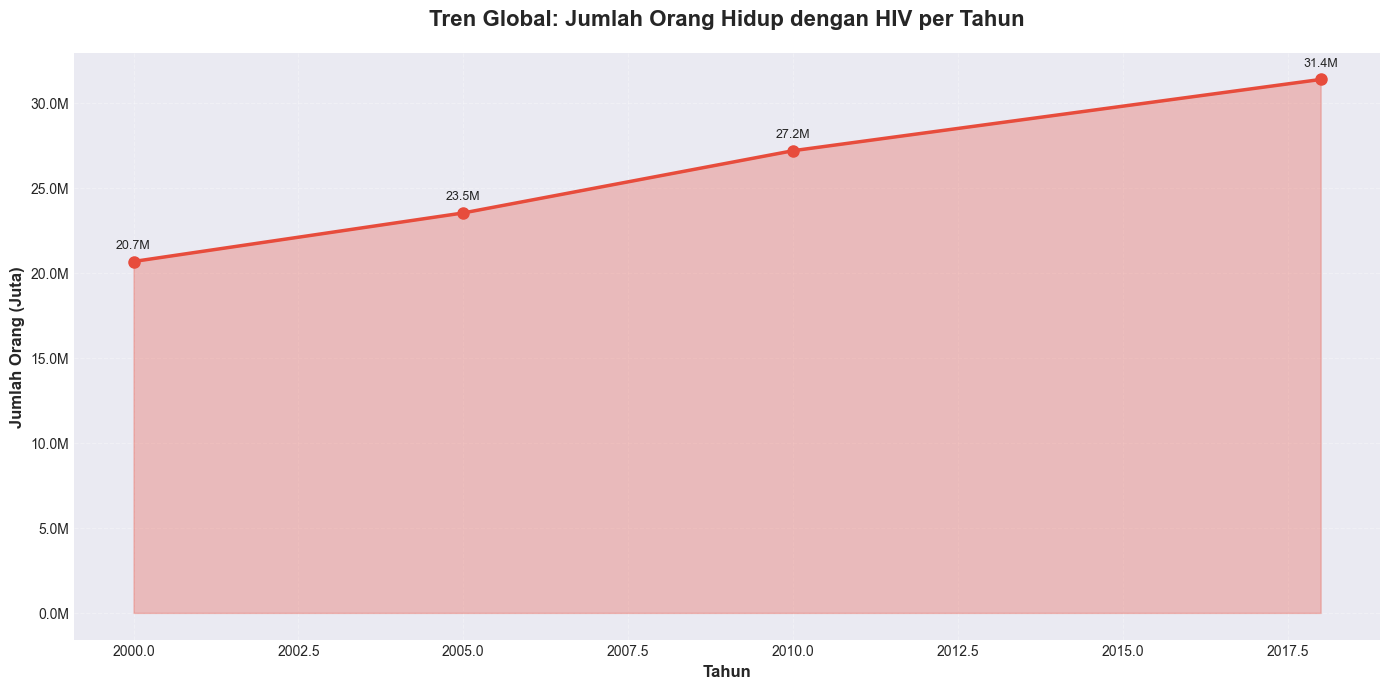

✅ Grafik tren waktu berhasil dibuat!


In [11]:
# Visualisasi Tren Waktu - Line Chart
plt.figure(figsize=(14, 7))

yearly_total = df_hiv_clean.groupby('Year')['Count_median'].sum().sort_index()

plt.plot(yearly_total.index, yearly_total.values, marker='o', linewidth=2.5, markersize=8, color='#e74c3c')
plt.fill_between(yearly_total.index, yearly_total.values, alpha=0.3, color='#e74c3c')

plt.title('Tren Global: Jumlah Orang Hidup dengan HIV per Tahun', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tahun', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Orang (Juta)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

# Format y-axis dalam juta
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Annotate points
for year, value in zip(yearly_total.index, yearly_total.values):
    plt.annotate(f'{value/1e6:.1f}M', 
                (year, value), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Grafik tren waktu berhasil dibuat!")


## 5. Analisis Sebaran Geografis (Spatial Distribution)

**Langkah:**
- Kelompokkan data berdasarkan negara
- Identifikasi hotspot kasus tertinggi
- Visualisasi distribusi geografis


In [12]:
# Analisis per Negara - Top 20 Negara dengan Kasus Tertinggi
print("=" * 80)
print("🌍 TOP 20 NEGARA DENGAN KASUS HIV TERTINGGI")
print("=" * 80)

country_stats = df_hiv_clean.groupby('Country').agg({
    'Count_median': ['sum', 'mean', 'max']
}).round(2)

country_stats.columns = ['Total Kasus', 'Rata-rata', 'Maksimum']
country_stats = country_stats.sort_values('Total Kasus', ascending=False)

print("\n📊 Top 20 Negara:")
print(country_stats.head(20).to_string())


🌍 TOP 20 NEGARA DENGAN KASUS HIV TERTINGGI

📊 Top 20 Negara:
                                  Total Kasus  Rata-rata   Maksimum
Country                                                            
South Africa                       22100000.0  5525000.0  7700000.0
Kenya                               6300000.0  1575000.0  1700000.0
Nigeria                             6100000.0  1525000.0  1900000.0
Mozambique                          5840000.0  1460000.0  2200000.0
Zimbabwe                            5500000.0  1375000.0  1600000.0
United Republic of Tanzania         5200000.0  1300000.0  1600000.0
Uganda                              4700000.0  1175000.0  1400000.0
Zambia                              4010000.0  1002500.0  1200000.0
Malawi                              3500000.0   875000.0  1000000.0
Ethiopia                            2710000.0   677500.0   750000.0
Brazil                              2530000.0   632500.0   900000.0
Thailand                            2430000.0   607500.

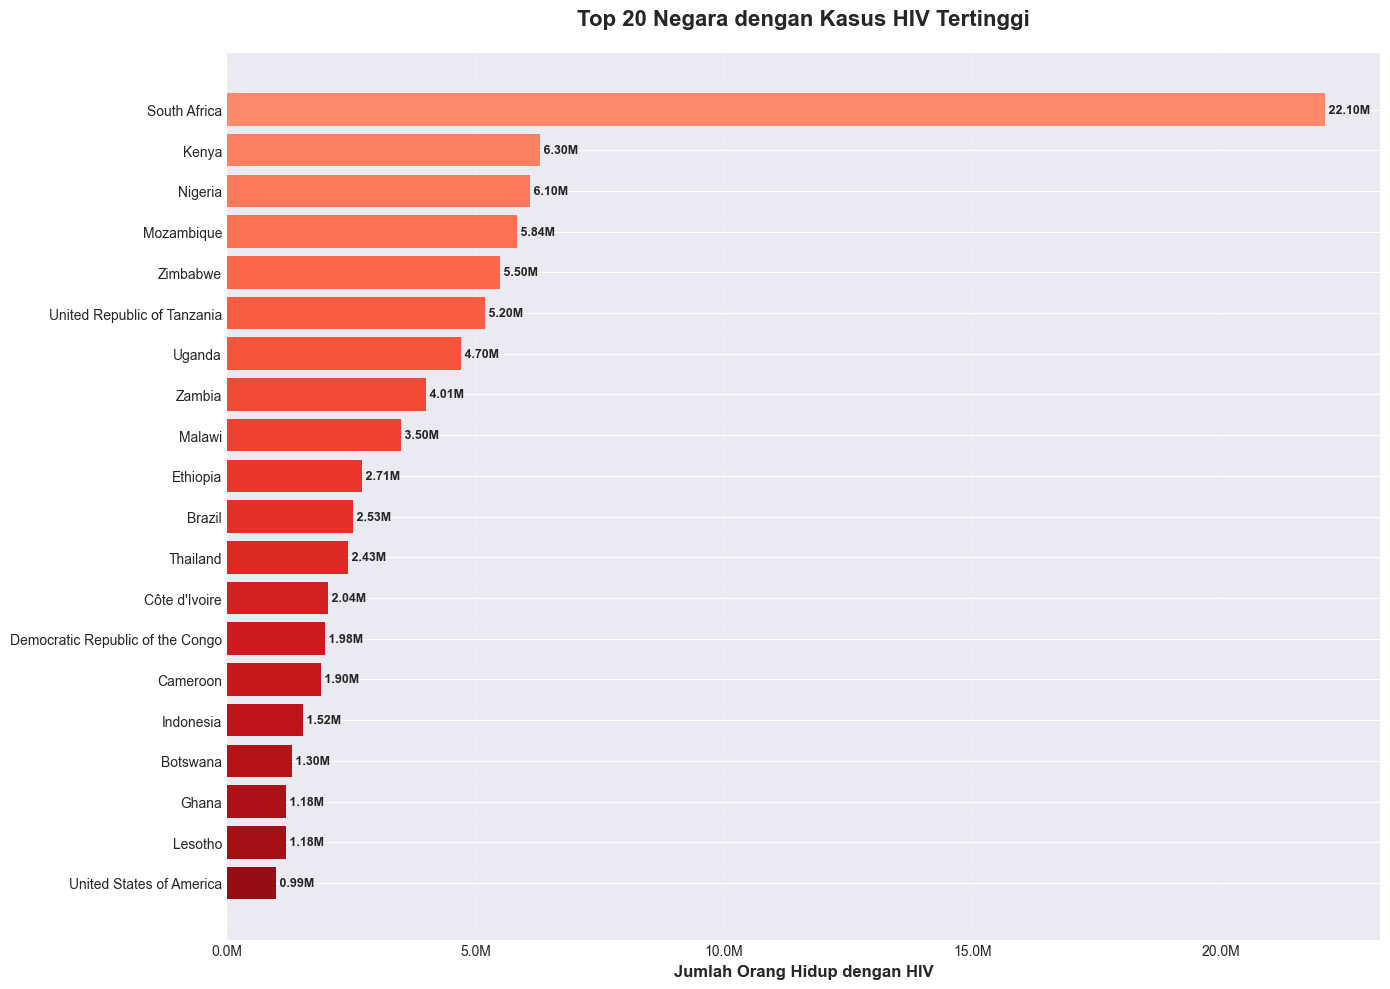

✅ Grafik top 20 negara berhasil dibuat!


In [13]:
# Visualisasi Top 20 Negara dengan Kasus Tertinggi
plt.figure(figsize=(14, 10))

top_20 = country_stats.head(20)
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_20)))

bars = plt.barh(range(len(top_20)), top_20['Total Kasus'].values, color=colors)
plt.yticks(range(len(top_20)), top_20.index)
plt.xlabel('Jumlah Orang Hidup dengan HIV', fontsize=12, fontweight='bold')
plt.title('Top 20 Negara dengan Kasus HIV Tertinggi', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Add value labels
for i, (idx, row) in enumerate(top_20.iterrows()):
    value = row['Total Kasus']
    plt.text(value, i, f' {value/1e6:.2f}M', va='center', fontsize=9, fontweight='bold')

plt.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

print("✅ Grafik top 20 negara berhasil dibuat!")


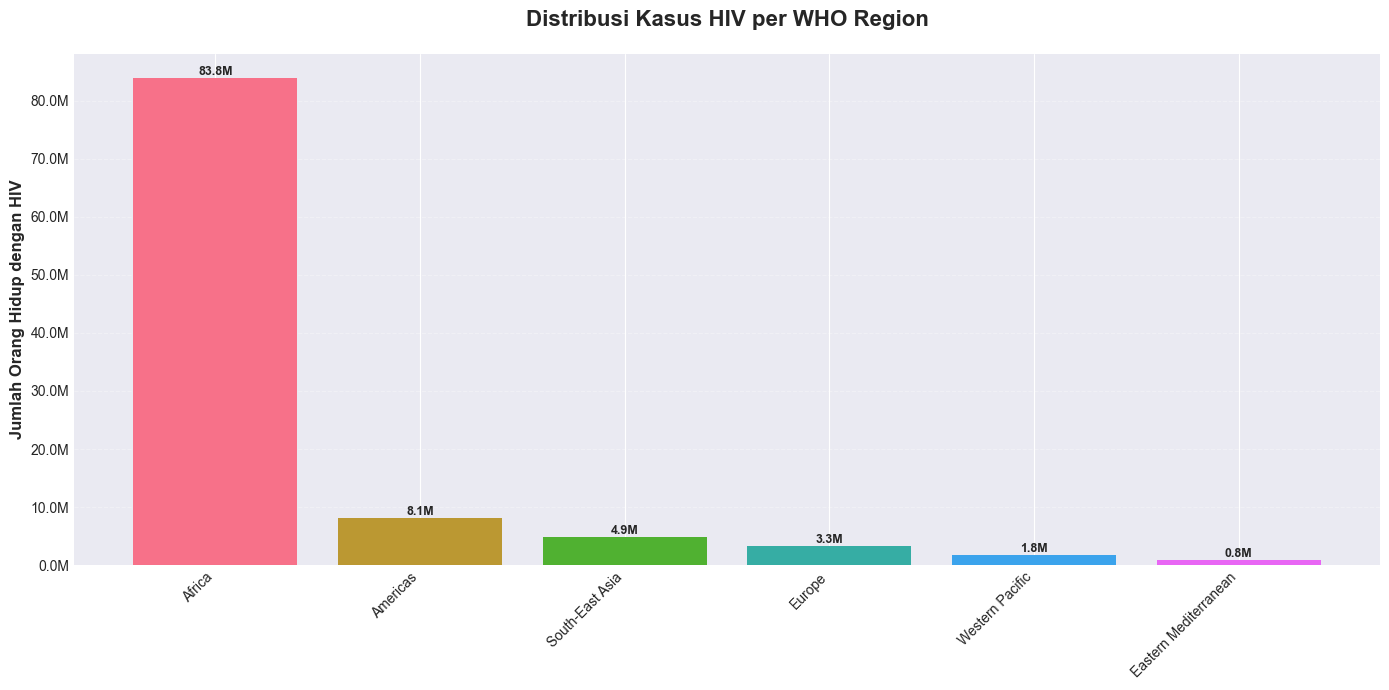

✅ Grafik distribusi per region berhasil dibuat!


In [14]:
# Analisis per WHO Region - Visualisasi
plt.figure(figsize=(14, 7))

region_total = df_hiv_clean.groupby('WHO Region')['Count_median'].sum().sort_values(ascending=False)
colors_region = sns.color_palette("husl", len(region_total))

bars = plt.bar(range(len(region_total)), region_total.values, color=colors_region)
plt.xticks(range(len(region_total)), region_total.index, rotation=45, ha='right')
plt.ylabel('Jumlah Orang Hidup dengan HIV', fontsize=12, fontweight='bold')
plt.title('Distribusi Kasus HIV per WHO Region', fontsize=16, fontweight='bold', pad=20)

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Add value labels
for i, (region, value) in enumerate(region_total.items()):
    plt.text(i, value, f'\n{value/1e6:.1f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("✅ Grafik distribusi per region berhasil dibuat!")


    ## 6. Analisis Korelasi Antarvariabel

    **Langkah:**
    - Gabungkan data HIV dengan variabel lain (deaths, ART coverage)
    - Hitung korelasi
    - Visualisasi heatmap korelasi


In [15]:
# Pembersihan dan persiapan data untuk analisis korelasi
print("=" * 80)
print("🔗 MENYIAPKAN DATA UNTUK ANALISIS KORELASI")
print("=" * 80)

# Bersihkan dataset deaths
df_deaths_clean = df_deaths[df_deaths['Count_median'] != 'na'].copy()
df_deaths_clean = df_deaths_clean[df_deaths_clean['Count_median'].notna()].copy()
df_deaths_clean['Count_median'] = pd.to_numeric(df_deaths_clean['Count_median'], errors='coerce')
df_deaths_clean = df_deaths_clean.dropna(subset=['Count_median'])

# Bersihkan dataset cases adults
df_cases_adults_clean = df_cases_adults[df_cases_adults['Count_median'] != 'na'].copy()
df_cases_adults_clean = df_cases_adults_clean[df_cases_adults_clean['Count_median'].notna()].copy()
df_cases_adults_clean['Count_median'] = pd.to_numeric(df_cases_adults_clean['Count_median'], errors='coerce')
df_cases_adults_clean = df_cases_adults_clean.dropna(subset=['Count_median'])

print(f"\n✅ Dataset HIV: {len(df_hiv_clean)} baris")
print(f"✅ Dataset Deaths: {len(df_deaths_clean)} baris")
print(f"✅ Dataset Cases Adults: {len(df_cases_adults_clean)} baris")


🔗 MENYIAPKAN DATA UNTUK ANALISIS KORELASI

✅ Dataset HIV: 553 baris
✅ Dataset Deaths: 400 baris
✅ Dataset Cases Adults: 556 baris


In [16]:
# Menggabungkan dataset berdasarkan Country dan Year
print("=" * 80)
print("🔗 MENGGABUNGKAN DATASET")
print("=" * 80)

# Agregasi per negara (ambil rata-rata jika ada multiple years)
hiv_by_country = df_hiv_clean.groupby('Country')['Count_median'].mean().reset_index()
hiv_by_country.rename(columns={'Count_median': 'HIV_Cases'}, inplace=True)

deaths_by_country = df_deaths_clean.groupby('Country')['Count_median'].mean().reset_index()
deaths_by_country.rename(columns={'Count_median': 'AIDS_Deaths'}, inplace=True)

cases_adults_by_country = df_cases_adults_clean.groupby('Country')['Count_median'].mean().reset_index()
cases_adults_by_country.rename(columns={'Count_median': 'Adult_Cases_15_49'}, inplace=True)

# Merge datasets
merged_df = hiv_by_country.merge(deaths_by_country, on='Country', how='inner')
merged_df = merged_df.merge(cases_adults_by_country, on='Country', how='inner')

print(f"\n✅ Dataset gabungan: {len(merged_df)} negara")
print(f"\n📊 Preview data gabungan:")
print(merged_df.head(10))


🔗 MENGGABUNGKAN DATASET

✅ Dataset gabungan: 134 negara

📊 Preview data gabungan:
       Country  HIV_Cases  AIDS_Deaths  Adult_Cases_15_49
0  Afghanistan     3975.0   366.666667              0.100
1      Algeria     7175.0   166.666667              0.100
2       Angola   196750.0  9600.000000              1.525
3    Argentina    99750.0  1566.666667              0.350
4      Armenia     2612.5   166.666667              0.150
5    Australia    19500.0   400.000000              0.100
6      Bahamas     5500.0   300.000000              2.225
7   Bangladesh     6660.0   393.333333              0.100
8     Barbados     2025.0   100.000000              1.125
9      Belarus    11450.0   266.666667              0.225


In [17]:
# Menghitung Korelasi
print("=" * 80)
print("📊 MATRIKS KORELASI")
print("=" * 80)

correlation_matrix = merged_df[['HIV_Cases', 'AIDS_Deaths', 'Adult_Cases_15_49']].corr()
print("\n🔗 Korelasi antar variabel:")
print(correlation_matrix.round(3))


📊 MATRIKS KORELASI

🔗 Korelasi antar variabel:
                   HIV_Cases  AIDS_Deaths  Adult_Cases_15_49
HIV_Cases              1.000        0.908              0.492
AIDS_Deaths            0.908        1.000              0.501
Adult_Cases_15_49      0.492        0.501              1.000


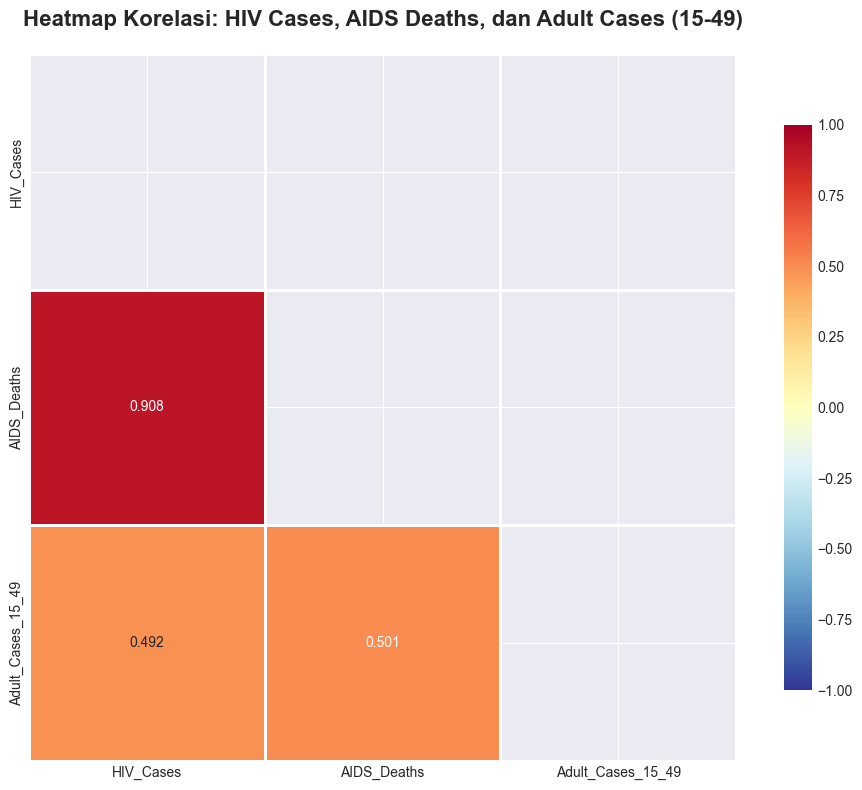

✅ Heatmap korelasi berhasil dibuat!

💡 Interpretasi:
   - Nilai mendekati +1: Korelasi positif kuat
   - Nilai mendekati -1: Korelasi negatif kuat
   - Nilai mendekati 0: Tidak ada korelasi


In [18]:
# Visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            linewidths=2,
            cbar_kws={"shrink": 0.8},
            mask=mask,
            vmin=-1, vmax=1)

plt.title('Heatmap Korelasi: HIV Cases, AIDS Deaths, dan Adult Cases (15-49)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Heatmap korelasi berhasil dibuat!")
print("\n💡 Interpretasi:")
print("   - Nilai mendekati +1: Korelasi positif kuat")
print("   - Nilai mendekati -1: Korelasi negatif kuat")
print("   - Nilai mendekati 0: Tidak ada korelasi")


## 7. Analisis Outlier & Distribusi Kasus

**Langkah:**
- Deteksi outlier menggunakan boxplot
- Analisis distribusi dengan histogram
- Identifikasi negara dengan nilai ekstrem


📦 ANALISIS OUTLIER - Boxplot


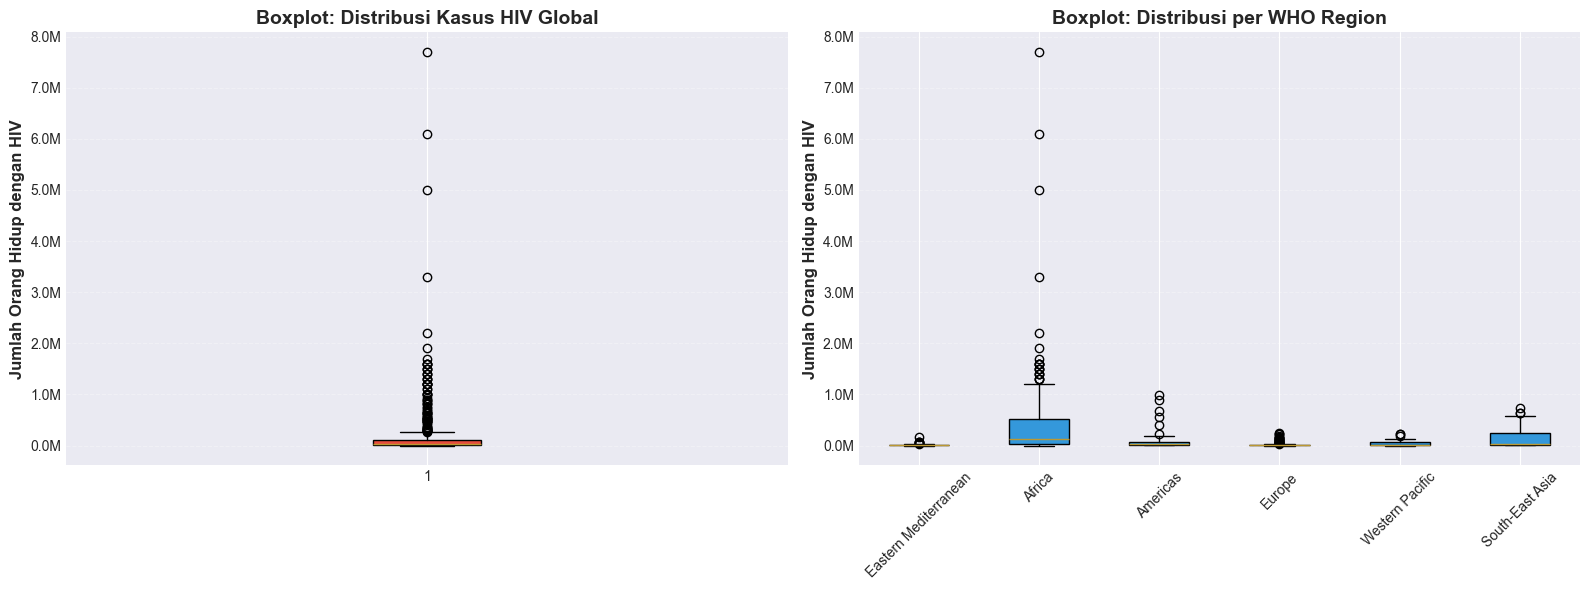

✅ Boxplot berhasil dibuat!

💡 Outlier terdeteksi pada nilai yang berada di luar whiskers (garis vertikal)


In [19]:
# Deteksi Outlier menggunakan Boxplot
print("=" * 80)
print("📦 ANALISIS OUTLIER - Boxplot")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot untuk Count_median
bp1 = axes[0].boxplot(df_hiv_clean['Count_median'], vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('#e74c3c')
axes[0].set_ylabel('Jumlah Orang Hidup dengan HIV', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot: Distribusi Kasus HIV Global', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Boxplot per WHO Region
region_data = [df_hiv_clean[df_hiv_clean['WHO Region'] == region]['Count_median'].values 
               for region in df_hiv_clean['WHO Region'].unique()]
bp2 = axes[1].boxplot(region_data, labels=df_hiv_clean['WHO Region'].unique(), patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('#3498db')
axes[1].set_ylabel('Jumlah Orang Hidup dengan HIV', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot: Distribusi per WHO Region', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

print("✅ Boxplot berhasil dibuat!")
print("\n💡 Outlier terdeteksi pada nilai yang berada di luar whiskers (garis vertikal)")


In [20]:
# Identifikasi Negara dengan Outlier Ekstrem
print("=" * 80)
print("🔍 IDENTIFIKASI OUTLIER EKSTREM")
print("=" * 80)

Q1 = df_hiv_clean['Count_median'].quantile(0.25)
Q3 = df_hiv_clean['Count_median'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_hiv_clean[(df_hiv_clean['Count_median'] < lower_bound) | 
                        (df_hiv_clean['Count_median'] > upper_bound)]

print(f"\n📊 Statistik Quartil:")
print(f"   Q1 (25%): {Q1:,.0f}")
print(f"   Q3 (75%): {Q3:,.0f}")
print(f"   IQR: {IQR:,.0f}")
print(f"   Lower Bound: {lower_bound:,.0f}")
print(f"   Upper Bound: {upper_bound:,.0f}")

print(f"\n⚠️ Jumlah outlier: {len(outliers)} negara")
print(f"\n🔝 Top 10 Outlier Positif (Kasus Tertinggi):")
top_outliers = outliers.nlargest(10, 'Count_median')[['Country', 'Count_median', 'WHO Region']]
print(top_outliers.to_string(index=False))


🔍 IDENTIFIKASI OUTLIER EKSTREM

📊 Statistik Quartil:
   Q1 (25%): 3,700
   Q3 (75%): 110,000
   IQR: 106,300
   Lower Bound: -155,750
   Upper Bound: 269,450

⚠️ Jumlah outlier: 76 negara

🔝 Top 10 Outlier Positif (Kasus Tertinggi):
                    Country  Count_median WHO Region
               South Africa     7700000.0     Africa
               South Africa     6100000.0     Africa
               South Africa     5000000.0     Africa
               South Africa     3300000.0     Africa
                 Mozambique     2200000.0     Africa
                    Nigeria     1900000.0     Africa
                      Kenya     1700000.0     Africa
                      Kenya     1600000.0     Africa
United Republic of Tanzania     1600000.0     Africa
                 Mozambique     1600000.0     Africa


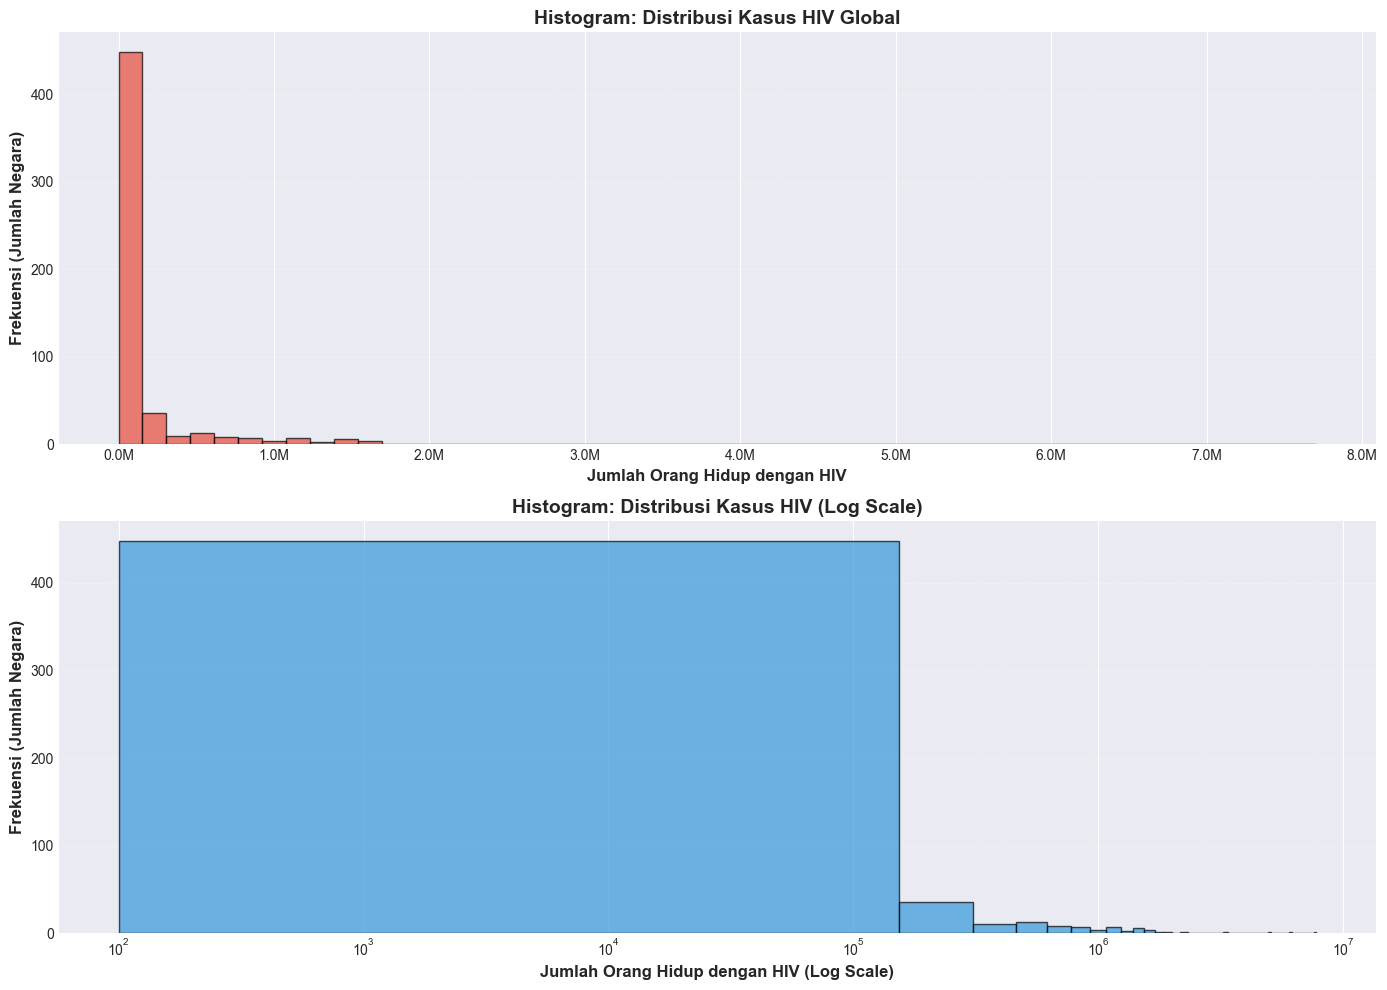

✅ Histogram distribusi berhasil dibuat!

💡 Histogram log scale membantu melihat distribusi yang sangat skewed


In [21]:
# Histogram Distribusi Kasus HIV
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Histogram normal
axes[0].hist(df_hiv_clean['Count_median'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Jumlah Orang Hidup dengan HIV', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frekuensi (Jumlah Negara)', fontsize=12, fontweight='bold')
axes[0].set_title('Histogram: Distribusi Kasus HIV Global', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Histogram dengan log scale (untuk melihat distribusi lebih jelas)
axes[1].hist(df_hiv_clean['Count_median'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[1].set_xscale('log')
axes[1].set_xlabel('Jumlah Orang Hidup dengan HIV (Log Scale)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frekuensi (Jumlah Negara)', fontsize=12, fontweight='bold')
axes[1].set_title('Histogram: Distribusi Kasus HIV (Log Scale)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("✅ Histogram distribusi berhasil dibuat!")
print("\n💡 Histogram log scale membantu melihat distribusi yang sangat skewed")


In [22]:
# Analisis Skewness dan Kurtosis
from scipy import stats

print("=" * 80)
print("📊 ANALISIS DISTRIBUSI - Skewness & Kurtosis")
print("=" * 80)

skewness = stats.skew(df_hiv_clean['Count_median'])
kurtosis = stats.kurtosis(df_hiv_clean['Count_median'])

print(f"\n📈 Skewness: {skewness:.3f}")
if skewness > 1:
    print("   → Distribusi sangat miring ke kanan (right-skewed)")
    print("   → Banyak negara dengan kasus rendah, beberapa negara dengan kasus sangat tinggi")
elif skewness < -1:
    print("   → Distribusi sangat miring ke kiri (left-skewed)")
else:
    print("   → Distribusi relatif simetris")

print(f"\n📈 Kurtosis: {kurtosis:.3f}")
if kurtosis > 3:
    print("   → Distribusi memiliki ekor yang lebih tebal (leptokurtic)")
    print("   → Banyak outlier ekstrem")
elif kurtosis < 3:
    print("   → Distribusi memiliki ekor yang lebih tipis (platykurtic)")
else:
    print("   → Distribusi normal (mesokurtic)")


📊 ANALISIS DISTRIBUSI - Skewness & Kurtosis

📈 Skewness: 7.869
   → Distribusi sangat miring ke kanan (right-skewed)
   → Banyak negara dengan kasus rendah, beberapa negara dengan kasus sangat tinggi

📈 Kurtosis: 81.610
   → Distribusi memiliki ekor yang lebih tebal (leptokurtic)
   → Banyak outlier ekstrem


## 8. Analisis Tambahan: Scatter Plot & Relationship Analysis

**Langkah:**
- Scatter plot hubungan HIV Cases vs AIDS Deaths
- Analisis hubungan dengan visualisasi


📊 SCATTER PLOT: Hubungan HIV Cases vs AIDS Deaths


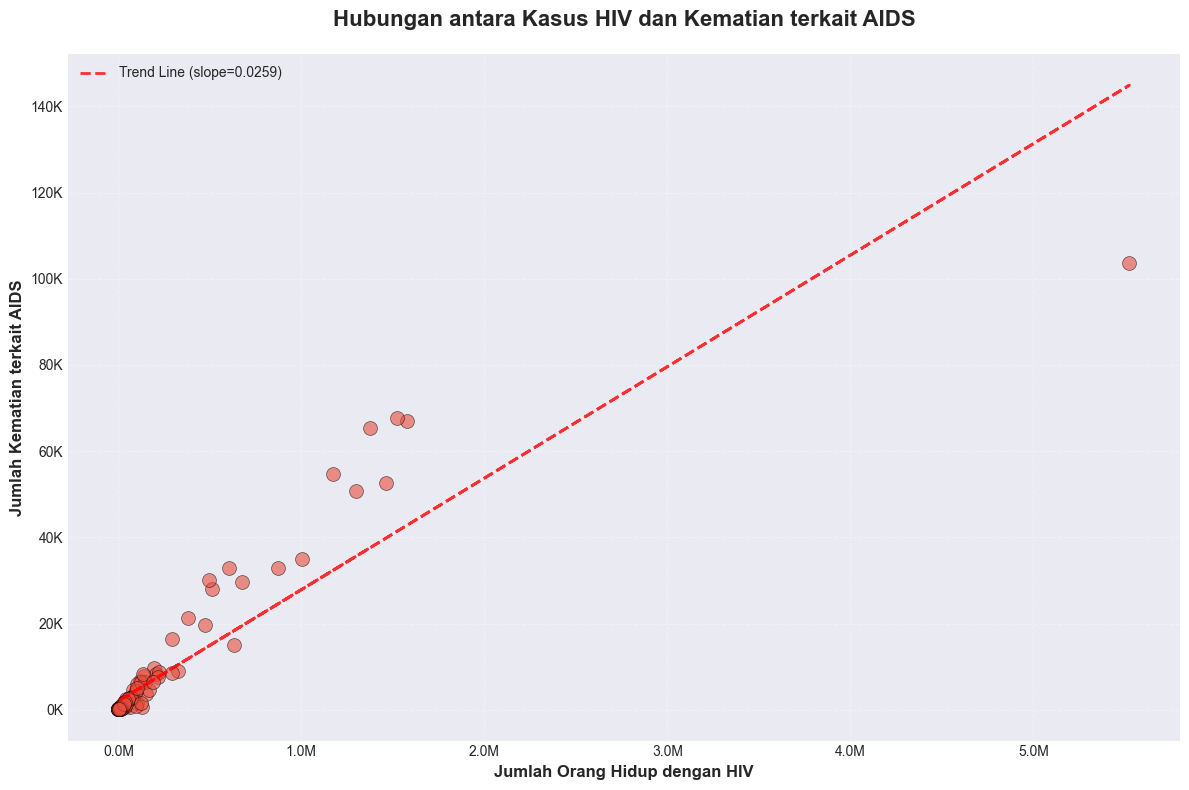


🔗 Korelasi: 0.908
✅ Scatter plot berhasil dibuat!


In [23]:
# Scatter Plot: HIV Cases vs AIDS Deaths
print("=" * 80)
print("📊 SCATTER PLOT: Hubungan HIV Cases vs AIDS Deaths")
print("=" * 80)

plt.figure(figsize=(12, 8))

plt.scatter(merged_df['HIV_Cases'], merged_df['AIDS_Deaths'], 
           alpha=0.6, s=100, c='#e74c3c', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(merged_df['HIV_Cases'], merged_df['AIDS_Deaths'], 1)
p = np.poly1d(z)
plt.plot(merged_df['HIV_Cases'], p(merged_df['HIV_Cases']), 
        "r--", alpha=0.8, linewidth=2, label=f'Trend Line (slope={z[0]:.4f})')

plt.xlabel('Jumlah Orang Hidup dengan HIV', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kematian terkait AIDS', fontsize=12, fontweight='bold')
plt.title('Hubungan antara Kasus HIV dan Kematian terkait AIDS', 
         fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')

# Format axes
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()

correlation = merged_df['HIV_Cases'].corr(merged_df['AIDS_Deaths'])
print(f"\n🔗 Korelasi: {correlation:.3f}")
print("✅ Scatter plot berhasil dibuat!")


## 9. Ringkasan dan Kesimpulan EDA

**Ringkasan temuan:**
- Dataset telah dibersihkan dan siap untuk modeling
- Tren global HIV telah diidentifikasi
- Hotspot geografis telah ditemukan
- Korelasi antar variabel telah dianalisis
- Outlier telah diidentifikasi


In [24]:
# Ringkasan EDA
print("=" * 80)
print("📋 RINGKASAN EDA - Analisis Big Data HIV/AIDS")
print("=" * 80)

print("\n✅ HASIL EDA:")
print("\n1. DATA CLEANING:")
print(f"   - Dataset awal: {len(df_hiv)} baris")
print(f"   - Dataset bersih: {len(df_hiv_clean)} baris")
print(f"   - Data yang dihapus: {len(df_hiv) - len(df_hiv_clean)} baris")

print("\n2. STATISTIK UTAMA:")
print(f"   - Total kasus HIV (median): {df_hiv_clean['Count_median'].sum():,.0f}")
print(f"   - Rata-rata per negara: {df_hiv_clean['Count_median'].mean():,.0f}")
print(f"   - Median: {df_hiv_clean['Count_median'].median():,.0f}")
print(f"   - Jumlah negara: {df_hiv_clean['Country'].nunique()}")

print("\n3. HOTSPOT GEOGRAFIS:")
top_5_countries = country_stats.head(5)
for i, (country, row) in enumerate(top_5_countries.iterrows(), 1):
    print(f"   {i}. {country}: {row['Total Kasus']:,.0f} kasus")

print("\n4. DISTRIBUSI PER REGION:")
region_total = df_hiv_clean.groupby('WHO Region')['Count_median'].sum().sort_values(ascending=False)
for region, total in region_total.items():
    print(f"   - {region}: {total:,.0f} kasus ({total/region_total.sum()*100:.1f}%)")

print("\n5. KORELASI:")
if len(merged_df) > 0:
    corr_hiv_deaths = merged_df['HIV_Cases'].corr(merged_df['AIDS_Deaths'])
    print(f"   - HIV Cases vs AIDS Deaths: {corr_hiv_deaths:.3f}")

print("\n6. OUTLIER:")
print(f"   - Jumlah outlier terdeteksi: {len(outliers)} negara")
print(f"   - Negara dengan kasus tertinggi: {df_hiv_clean.loc[df_hiv_clean['Count_median'].idxmax(), 'Country']}")

print("\n" + "=" * 80)
print("✅ EDA SELESAI - Data siap untuk modeling dan visualisasi!")
print("=" * 80)


📋 RINGKASAN EDA - Analisis Big Data HIV/AIDS

✅ HASIL EDA:

1. DATA CLEANING:
   - Dataset awal: 680 baris
   - Dataset bersih: 553 baris
   - Data yang dihapus: 127 baris

2. STATISTIK UTAMA:
   - Total kasus HIV (median): 102,742,880
   - Rata-rata per negara: 185,792
   - Median: 21,000
   - Jumlah negara: 140

3. HOTSPOT GEOGRAFIS:
   1. South Africa: 22,100,000 kasus
   2. Kenya: 6,300,000 kasus
   3. Nigeria: 6,100,000 kasus
   4. Mozambique: 5,840,000 kasus
   5. Zimbabwe: 5,500,000 kasus

4. DISTRIBUSI PER REGION:
   - Africa: 83,849,000 kasus (81.6%)
   - Americas: 8,073,100 kasus (7.9%)
   - South-East Asia: 4,920,170 kasus (4.8%)
   - Europe: 3,281,540 kasus (3.2%)
   - Western Pacific: 1,793,000 kasus (1.7%)
   - Eastern Mediterranean: 826,070 kasus (0.8%)

5. KORELASI:
   - HIV Cases vs AIDS Deaths: 0.908

6. OUTLIER:
   - Jumlah outlier terdeteksi: 76 negara
   - Negara dengan kasus tertinggi: South Africa

✅ EDA SELESAI - Data siap untuk modeling dan visualisasi!


In [25]:
# Menyimpan dataset yang sudah dibersihkan untuk keperluan selanjutnya
print("=" * 80)
print("💾 MENYIMPAN DATASET BERSIH")
print("=" * 80)

df_hiv_clean.to_csv('hiv_data_cleaned.csv', index=False)
merged_df.to_csv('hiv_merged_data.csv', index=False)

print("\n✅ Dataset berhasil disimpan:")
print("   - hiv_data_cleaned.csv")
print("   - hiv_merged_data.csv")
print("\n📁 File siap digunakan untuk modeling dan visualisasi dashboard!")


💾 MENYIMPAN DATASET BERSIH

✅ Dataset berhasil disimpan:
   - hiv_data_cleaned.csv
   - hiv_merged_data.csv

📁 File siap digunakan untuk modeling dan visualisasi dashboard!
